#Bibliotecas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sympy as sym
import pandas as pd
from random import uniform

# Métodos

##Método da Bissecção

In [ ]:
def bisseccao(f_x, a, b,precisao=0.0000001, n=10000):
  df = pd.DataFrame(columns=['a(n)', 'b(n)', 'x(n)', 'f(x(n))', 'f(a(n))', 'f(a(n)) * f(x(n))'])
  x = (a + b) / 2 

  if (f_x(a) * f_x(b) < 0):
    if (b - a) < precisao:
      rnd_pos = uniform(a, b)
      df.loc[0] = [a, b, rnd_pos, f_x(rnd_pos), f_x(a), f_x(a)*f_x(x)]
      return df.round(4)

    for k in range(n):
      x = (a + b) / 2 
      df.loc[k] = [a, b, x, f_x(x), f_x(a), f_x(a)*f_x(x)]
      if (f_x(a) * f_x(x)) > 0: a = x
      else: b = x
      if (b - a) < precisao: break
  else: return 'Não há raízes no intervalo dado.'
  return df.round(4)

##Método da Falsa Posição

In [ ]:
def falsaposicao(f, a, b, precisao=0.0000001, n=10000):
  df = pd.DataFrame(columns=['a(n)', 'b(n)', 'x(n)', 'f(x(n))'])
  x = a - (b - a) * f_x(a) / (f_x(b) - f_x(a))

  if (f_x(a) * f_x(b)) < 0:
    if (b - a) < precisao:
      rnd_pos = uniform(a, b)
      df.loc[0] = [a, b, rnd_pos, f_x(rnd_pos)]
      return df.round(4)

    for k in range(n):
      x = a - (b - a) * f_x(a) / (f_x(b) - f_x(a))
      df.loc[k] = [a, b, x, f_x(x)]
      if abs(f_x(x)) < precisao: break
      if (f_x(a) * f_x(x)) > 0: a = x
      else: b = x
      if (b - a) < precisao: break
  else:
    return 'Não há raízes no intervalo dado.'
  return df.round(4)  

##Método da tangente

In [ ]:
def tangente(f_x, derivada, x0, precisao=0.0000001, n=10000):
  df = pd.DataFrame(columns=['x(n)', 'f(x(n))']) 
  df.loc[0] = [x0, f_x(x0)]
  if abs(f_x(x0)) < precisao: return df.round(4)

  for k in range(1, n):
    x1 = x0 - (f_x(x0) / derivada(x0))
    df.loc[k] = [x1, f_x(x1)]
    if abs(f_x(x1)) < precisao: break
    x0 = x1
  return df.round(4)


##Método da Secante

In [ ]:
def secante(f_x, x0, x1, precisao=0.0000001, n=10000):
  df = pd.DataFrame(columns=['x(n)', 'f(x(n))'])
  x_eq = lambda a,b: b - (b - a)/(f_x(b) - f_x(a)) * f_x(b)
  df.loc[0] = [x0, f_x(x0)]
  if abs(f_x(x0)) < precisao: return df.round(4)

  df.loc[1] = [x1, f_x(x1)]
  if abs(f_x(x1)) < precisao: return df.round(4)

  for k in range(2, n):
    x = x_eq(x0, x1)
    df.loc[k] = [(x), f_x(x)]
    if abs(f_x(x)) < precisao: break
    else: 
      x0 = x1
      x1 = x
  return df.round(4)

# Relatório 1


##Questão 1 – Determine por meio do método da bissecção, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = 2^x - 2x^2 + 1

In [ ]:
f_x = lambda x: 2**x - 2*x**2 + 1
bisseccao(f_x, 1, 2, 0.01)

,a(n),b(n),x(n),f(x(n)),f(a(n)),f(a(n)) * f(x(n))
0,1.0000,2.0000,1.5000,-0.6716,1.0000,-0.6716
1,1.0000,1.5000,1.2500,0.2534,1.0000,0.2534
2,1.2500,1.5000,1.3750,-0.1876,0.2534,-0.0475
3,1.2500,1.3750,1.3125,0.0384,0.2534,0.0097
4,1.3125,1.3750,1.3438,-0.0732,0.0384,-0.0028
5,1.3125,1.3438,1.3281,-0.0171,0.0384,-0.0007
6,1.3125,1.3281,1.3203,0.0108,0.0384,0.0004


##Questão 2 – Determine por meio do método da falsa posição, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = x^2 - cos(x)

In [ ]:
f_x = lambda x: x**2 - math.cos(x)
falsaposicao(f_x, 0.5, 1, 0.0001)

,a(n),b(n),x(n),f(x(n))
0,0.5000,1.0,0.7886,-0.0829
1,0.7886,1.0,0.8209,-0.0077
2,0.8209,1.0,0.8238,-0.0007
3,0.8238,1.0,0.8241,-0.0001


##Questão 3 – Determine por meio do método da tangente, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = x^5 - x -1

In [ ]:
var = sym.Symbol('x')
f_x = lambda x: x**5 - x -1
derivada = lambda x: 5*x**4 - 1
tangente(f_x, derivada, 0.75, precisao=0.01)

,x(n),f(x(n))
0,0.7500,-1.5127
1,3.3490,416.9315
2,2.6851,135.8762
3,2.1602,43.8804
4,1.7535,13.8221
5,1.4547,4.0595
6,1.2649,0.9733
7,1.1824,0.1290
8,1.1677,0.0035
9,1.1673,0.0000


##Questão 4 – Determine por meio do método da secante, corretamente, até a quarta casa decimal, a menor raiz positiva, da equação f(x) = 3/(1+x^2) - 1/(2x^3)

In [ ]:
f_x = lambda x:  3/(1+x**2) - 1/(2*x**3)
secante(f_x, 1, 2, precisao=0.01)

,x(n),f(x(n))
0,1.0000,1.0000
1,2.0000,0.5375
2,3.1622,0.2569
3,4.2264,0.1524
4,5.7786,0.0846
5,7.7167,0.0485
6,10.3127,0.0275
7,13.7158,0.0157
8,18.2268,0.0089


##Questão 5 – Determine a menor raiz positiva de f(x) = ln(x^2) - 0,7

1. Graficamente
2. Usando o método da bissecção (três iterações, x0=0,5 e x1=2)
3. Usando o método da falsa posição (três iterações, x0=0,5 e x1=2)
4. Discuta sobre os resultados obtidos

##1.Graficamente

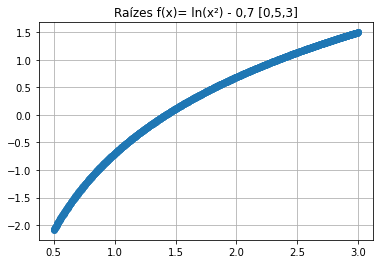

In [ ]:
f_x = lambda x: math.log(x**2) - 0.7
curva = np.linspace(0.5, 3, 1000)
valores = [f_x(valor) for valor in curva]
plt.plot(curva, valores, linestyle='-', marker='o')
plt.title('Raízes f(x)= ln(x²) - 0,7 [0,5,3]')

plt.grid()
plt.show()

##2.Usando o método da bissecção (três iterações, x0=0,5 e x1=2)

In [ ]:
f_x = lambda x: math.log(x**2) - 0.7
bisseccao(f_x, 0.5,2,n=3)

,a(n),b(n),x(n),f(x(n)),f(a(n)),f(a(n)) * f(x(n))
0,0.50,2.000,1.2500,-0.2537,-2.0863,0.5293
1,1.25,2.000,1.6250,0.2710,-0.2537,-0.0688
2,1.25,1.625,1.4375,0.0258,-0.2537,-0.0065


##3.Usando o método da falsa posição (três iterações, x0=0,5 e x1=2)

In [ ]:
f_x = lambda x: math.log(x**2) - 0.7
falsaposicao(f_x, 0.5,2,n=3)

,a(n),b(n),x(n),f(x(n))
0,0.5,2.0000,1.6287,0.2756
1,0.5,1.6287,1.4970,0.1069
2,0.5,1.4970,1.4484,0.0409


##4. Discuta os resultados obtidos
Foi possível observar que com o mesmo número de iterações e mesmos pontos x0 e x1, ao usar o método da bisseção tivemos uma melhor aproximação para a raiz do que ao usar o método da falsa posição, acredito que esse resultado se deu pois a quebra do intervalo pelo método da bissecção que usa a média simples foi mais eficiente com poucas iterações do que a do método da falsa posição que utiliza a média ponderada.

##Questão 6 – Determine a menor raiz positiva de f(x) = 7sen(x)e^-1 - 1

1. Graficamente
2. Usando o método da tangente (três iterações, x0=0,3)
3. Usando o método da secante (três iterações, x0=0,5 e x1=0,4)
4. Discuta sobre os resultados obtidos

##1.Graficamente

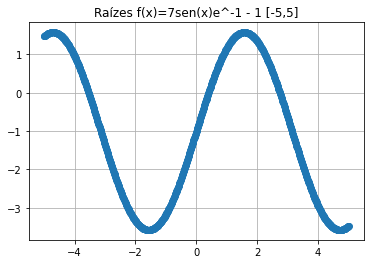

In [ ]:
f_x = lambda x: 7 * math.sin(x) * math.exp(-1) - 1
curva = np.linspace(-5, 5, 1000)
valores = [f_x(valor) for valor in curva]
plt.plot(curva, valores, linestyle='-', marker='o')
plt.title('Raízes f(x)=7sen(x)e^-1 - 1 [-5,5]')

plt.grid()
plt.show()

##2.Usando o método da tangente (três iterações, x0=0,3)

In [ ]:
var = sym.Symbol('x')
f_x = lambda x: 7 * math.sin(x) * math.exp(-1) - 1
derivada = lambda x: (7/math.exp(1))*math.cos(x)
tangente(f_x, derivada, 0.3, n=3)

,x(n),f(x(n))
0,0.3000,-0.239
1,0.3971,-0.004
2,0.3988,-0.000


##3.Usando o método da secante (três iterações, x0=0,5 e x1=0,4)

In [ ]:
f_x = lambda x: 7 * math.sin(x) * math.exp(-1) - 1
secante(f_x,0.5,0.4,n=3)

,x(n),f(x(n))
0,0.5000,0.2346
1,0.4000,0.0028
2,0.3988,-0.0001


##4.Discuta os resultados obtidos
Foi possível observar que ambos métodos tiveram um ótimo desempenho mesmo com poucas iterações, apesar disso, o método da tangente apresentou ainda uma melhor aproximação da raiz em comparação com o método da secante, acredito que um dos motivos para a rápida convergencia do método da tangente foi a proximidade do ponto inicial x0 da raiz, por outro lado acredito que o bom desempenho do método da secante em poucas iterações se deu pela pequena amplitude do intervalo que foi solicitado.